# CNN-LSTM Stock Price Prediction

- Name: ***Youself Sayed***
- ID: ***4211094***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

2025-05-10 13:33:51.868261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746884032.147968      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746884032.226068      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/A.csv', parse_dates=['Date'])


data.sort_values('Date', inplace=True)
prices = data['Close'].values

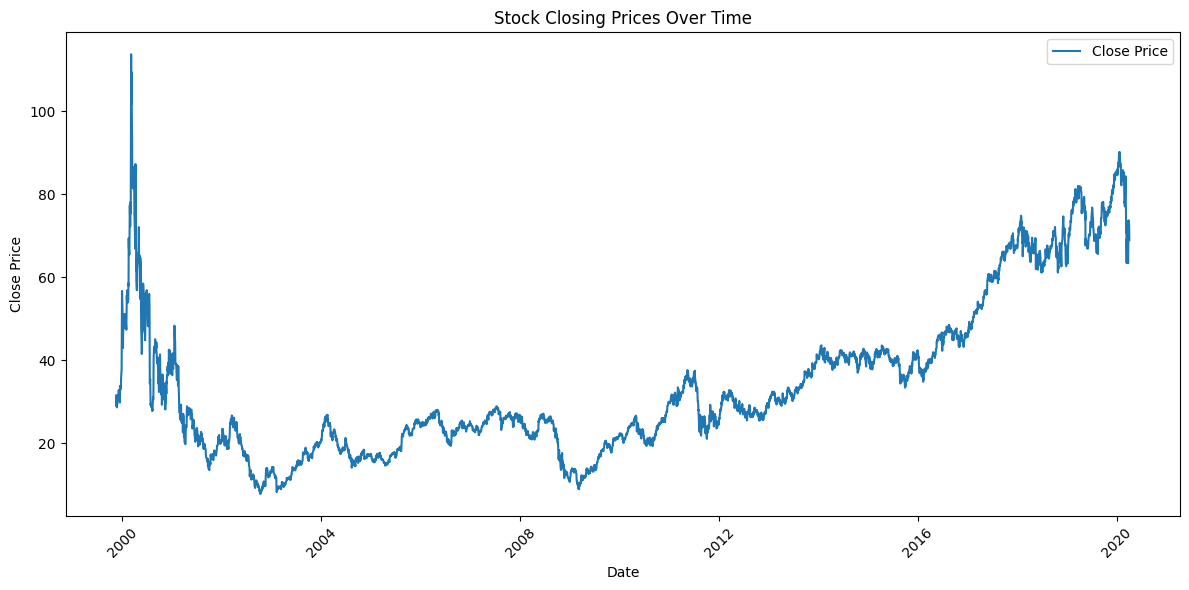

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
window_size = 100
X, y = [], []
for i in range(len(prices) - window_size):
    X.append(prices[i:i+window_size])
    y.append(prices[i+window_size])
X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y)

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Train shape: {train_X.shape}, Test shape: {test_X.shape}")

Train shape: (4019, 100, 1), Test shape: (1005, 100, 1)


In [8]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(window_size,1)),
    MaxPooling1D(2),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-10 13:36:18.997101: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,307 (91.04 KB)

 Trainable params: 23,307 (91.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_X, train_y, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 479.6835 - mae: 19.8212 - mse: 479.6835 - val_loss: 721.6852 - val_mae: 26.7727 - val_mse: 721.6852
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 191.1440 - mae: 10.8662 - mse: 191.1440 - val_loss: 472.5026 - val_mae: 21.6253 - val_mse: 472.5026
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 109.2676 - mae: 7.2687 - mse: 109.2676 - val_loss: 331.1193 - val_mae: 18.0630 - val_mse: 331.1193
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 65.7292 - mae: 4.8765 - mse: 65.7292 - val_loss: 239.1153 - val_mae: 15.3058 - val_mse: 239.1153
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 47.0606 - mae: 3.7564 - mse: 47.0606 - val_loss: 178.9028 - val_mae: 13.1930 - val_mse: 178.9028
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 36.2850 - mae: 2.9221 - mse: 36.2850 - val_loss: 133.6025 - val_mae: 11.3469 - val_mse: 133.6025
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 2

In [10]:
loss, mse, mae = model.evaluate(test_X, test_y)
print(f"Test Loss: {loss:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 272.8462 - mae: 12.3586 - mse: 272.8462
Test Loss: 612.9438, MSE: 612.9438, MAE: 21.6572
